In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import geopandas as gpd
%matplotlib inline

In [2]:
global_orphan_hiv_csv = pd.read_csv('../data/cleaned_data/orphan_global_causes.csv')
hiv_exp_csv = pd.read_csv('../data/cleaned_data/hiv_expenditure.csv')
hiv_funding_csv = pd.read_csv('../data/cleaned_data/hiv_funding.csv')
pov_pop_csv = pd.read_csv('../data/cleaned_data/pov_pop_stats.csv')



In [3]:
global_orphan_hiv = global_orphan_hiv_csv.drop(columns = ['Unnamed: 0', 'Lower', 'Upper'])
global_orphan_hiv = global_orphan_hiv.rename(columns = {'Value': 'Number_Orphans'})
global_orphan_hiv.head()

,ISO3,Type,Country_Region,UNICEF_Region,Indicator,Data_Source,Year,Number_Orphans
0,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1990-01-01,147800000
1,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1991-01-01,147900000
2,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1992-01-01,148300000
3,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1993-01-01,148900000
4,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1994-01-01,149900000


In [4]:
global_orphan_hiv.dtypes

ISO3              object
Type              object
Country_Region    object
UNICEF_Region     object
Indicator         object
Data_Source       object
Year              object
Number_Orphans     int64
dtype: object

In [5]:
# global_orphan_hiv['Year'] = pd.to_datetime(global_orphan_hiv['Year'], format = '%Y')
# global_orphan_hiv.info()

In [6]:
global_orphan_hiv.rename(columns = {'Country_Region':'Country'})

,ISO3,Type,Country,UNICEF_Region,Indicator,Data_Source,Year,Number_Orphans
0,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1990-01-01,147800000
1,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1991-01-01,147900000
2,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1992-01-01,148300000
3,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1993-01-01,148900000
4,03M49WLD,Region,Global,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,1994-01-01,149900000
...,...,...,...,...,...,...,...,...
7613,regionWCA,Region,West and Central Africa,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,2015-01-01,3150000
7614,regionWCA,Region,West and Central Africa,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,2016-01-01,3160000
7615,regionWCA,Region,West and Central Africa,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,2017-01-01,3150000
7616,regionWCA,Region,West and Central Africa,NaN,Estimated number of children (aged 0-17) who h...,UNAIDS 2020 estimates,2018-01-01,3110000


In [7]:
hiv_exp = hiv_exp_csv.drop(columns = 'Unnamed: 0')
hiv_exp.head()

,Country,Code,Year,Total_Expenditure
0,Afghanistan,AFG,2008-01-01,3241418.00
1,Afghanistan,AFG,2009-01-01,5158552.00
2,Afghanistan,AFG,2010-01-01,4437825.00
3,Afghanistan,AFG,2011-01-01,8002073.55
4,Afghanistan,AFG,2012-01-01,9052547.00


In [8]:
hiv_funding = hiv_funding_csv.drop(columns = 'Unnamed: 0')
hiv_funding.head()


,Country,Code,Year,Global_Fund,Domestic_Public,Domestic_Private,International,Other_Bilaterals,Development_Banks,Other_multilaterals,PEPFAR
0,Afghanistan,AFG,2008-01-01,0.000,129260.0,0.0,3112158.00,254053.0,2669283.0,0.0,NaN
1,Afghanistan,AFG,2009-01-01,1087983.000,132200.0,0.0,5026352.00,282525.0,3220281.0,0.0,NaN
2,Afghanistan,AFG,2010-01-01,1774255.000,200000.0,0.0,4237825.00,90499.0,1523129.0,0.0,NaN
3,Afghanistan,AFG,2011-01-01,1645559.550,0.0,0.0,8002073.55,1456111.0,3728220.0,0.0,NaN
4,Afghanistan,AFG,2012-01-01,1829829.153,24250.0,0.0,9028297.00,0.0,2080691.5,0.0,NaN


In [9]:
hiv_funding_clean = hiv_funding.fillna(0)

In [10]:
combined_funding = hiv_funding_clean['Global_Fund'] + hiv_funding_clean['Domestic_Public'] + hiv_funding_clean['Domestic_Private'] + hiv_funding_clean['International'] + hiv_funding_clean['Other_Bilaterals'] + hiv_funding_clean['Development_Banks'] + hiv_funding_clean['Other_multilaterals'] + hiv_funding_clean['PEPFAR']
hiv_funding_clean['total_funding'] = combined_funding
hiv_funding_clean.head()

,Country,Code,Year,Global_Fund,Domestic_Public,Domestic_Private,International,Other_Bilaterals,Development_Banks,Other_multilaterals,PEPFAR,total_funding
0,Afghanistan,AFG,2008-01-01,0.000,129260.0,0.0,3112158.00,254053.0,2669283.0,0.0,0.0,6.164754e+06
1,Afghanistan,AFG,2009-01-01,1087983.000,132200.0,0.0,5026352.00,282525.0,3220281.0,0.0,0.0,9.749341e+06
2,Afghanistan,AFG,2010-01-01,1774255.000,200000.0,0.0,4237825.00,90499.0,1523129.0,0.0,0.0,7.825708e+06
3,Afghanistan,AFG,2011-01-01,1645559.550,0.0,0.0,8002073.55,1456111.0,3728220.0,0.0,0.0,1.483196e+07
4,Afghanistan,AFG,2012-01-01,1829829.153,24250.0,0.0,9028297.00,0.0,2080691.5,0.0,0.0,1.296307e+07


In [11]:
pov_pop = pov_pop_csv.drop(columns = 'Unnamed: 0')
pov_pop.head()

,Country,Code,Indicator Name,Year,Value
0,East Asia & Pacific,EAS,"Population, total",1974-01-01,1.416257e+09
1,East Asia & Pacific,EAS,Poverty gap at national poverty lines (%),1974-01-01,NaN
2,East Asia & Pacific,EAS,Poverty headcount ratio at national poverty li...,1974-01-01,NaN
3,Europe & Central Asia,ECS,"Population, total",1974-01-01,7.610295e+08
4,Europe & Central Asia,ECS,Poverty gap at national poverty lines (%),1974-01-01,NaN


In [12]:
hiv_fund_exp = pd.merge(hiv_funding_clean, hiv_exp,
                        left_on=['Country', 'Code', 'Year'],
                        right_on=['Country', 'Code', 'Year'],
                          how='outer',
                        indicator=True)
hiv_fund_exp.head(10)

,Country,Code,Year,Global_Fund,Domestic_Public,Domestic_Private,International,Other_Bilaterals,Development_Banks,Other_multilaterals,PEPFAR,total_funding,Total_Expenditure,_merge
0,Afghanistan,AFG,2008-01-01,0.000,129260.000,0.0,3112158.00,2.540530e+05,2669283.0,0.0,0.0,6.164754e+06,3241418.000,both
1,Afghanistan,AFG,2009-01-01,1087983.000,132200.000,0.0,5026352.00,2.825250e+05,3220281.0,0.0,0.0,9.749341e+06,5158552.000,both
2,Afghanistan,AFG,2010-01-01,1774255.000,200000.000,0.0,4237825.00,9.049900e+04,1523129.0,0.0,0.0,7.825708e+06,4437825.000,both
3,Afghanistan,AFG,2011-01-01,1645559.550,0.000,0.0,8002073.55,1.456111e+06,3728220.0,0.0,0.0,1.483196e+07,8002073.550,both
4,Afghanistan,AFG,2012-01-01,1829829.153,24250.000,0.0,9028297.00,0.000000e+00,2080691.5,0.0,0.0,1.296307e+07,9052547.000,both
5,Afghanistan,AFG,2013-01-01,2268317.000,245000.000,0.0,5067479.00,2.231162e+06,0.0,0.0,0.0,9.811958e+06,5312479.000,both
6,Afghanistan,AFG,2014-01-01,1986380.000,104000.000,0.0,4077138.00,0.000000e+00,1631972.0,458786.0,0.0,8.258276e+06,4181138.000,both
7,Afghanistan,AFG,2015-01-01,0.000,0.000,0.0,0.00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000,both
8,Albania,ALB,2005-01-01,0.000,1110357.000,0.0,1266600.00,0.000000e+00,0.0,0.0,0.0,2.376957e+06,2376957.000,both
9,Algeria,DZA,2006-01-01,2396455.000,1133390.875,0.0,2540458.75,1.596247e+01,0.0,0.0,0.0,6.070321e+06,3673849.625,both


In [13]:
%who


combined_funding	 datetime	 global_orphan_hiv	 global_orphan_hiv_csv	 gpd	 hiv_exp	 hiv_exp_csv	 hiv_fund_exp	 hiv_funding	 
hiv_funding_clean	 hiv_funding_csv	 np	 pd	 plt	 pov_pop	 pov_pop_csv	 


In [14]:
global_orphan_hiv.dtypes

ISO3              object
Type              object
Country_Region    object
UNICEF_Region     object
Indicator         object
Data_Source       object
Year              object
Number_Orphans     int64
dtype: object

In [15]:
pov_pop.dtypes

Country            object
Code               object
Indicator Name     object
Year               object
Value             float64
dtype: object

In [16]:
pov_pop.reset_index(drop=True)

,Country,Code,Indicator Name,Year,Value
0,East Asia & Pacific,EAS,"Population, total",1974-01-01,1.416257e+09
1,East Asia & Pacific,EAS,Poverty gap at national poverty lines (%),1974-01-01,NaN
2,East Asia & Pacific,EAS,Poverty headcount ratio at national poverty li...,1974-01-01,NaN
3,Europe & Central Asia,ECS,"Population, total",1974-01-01,7.610295e+08
4,Europe & Central Asia,ECS,Poverty gap at national poverty lines (%),1974-01-01,NaN
...,...,...,...,...,...
24970,Zambia,ZMB,Poverty gap at national poverty lines (%),2018-01-01,NaN
24971,Zambia,ZMB,Poverty headcount ratio at national poverty li...,2018-01-01,NaN
24972,Zimbabwe,ZWE,"Population, total",2018-01-01,1.443902e+07
24973,Zimbabwe,ZWE,Poverty gap at national poverty lines (%),2018-01-01,NaN


In [17]:
for col in pov_pop.columns:
    print(col)

Country
Code
Indicator Name
Year
Value


In [18]:
hiv_fund_exp.to_csv('../data/final_data/hiv_fund_exp.csv')
pov_pop.to_csv('../data/final_data/pov_pop.csv')
global_orphan_hiv.to_csv('../data/final_data/global_orphan_hiv.csv')

In [19]:
africa_geometry = gpd.read_file('../data/continent_africa_geojson.json')
africa_geometry.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
africa_geometry.head()

,type,geounit,geometry
0,Sovereign country,Angola,"MULTIPOLYGON (((23.96790 -10.87180, 23.01183 -..."
1,Sovereign country,Burundi,"POLYGON ((30.55700 -2.40087, 29.69137 -2.81158..."
2,Sovereign country,Benin,"POLYGON ((3.59336 11.69167, 2.84401 12.39758, ..."
3,Sovereign country,Burkina Faso,"POLYGON ((0.22129 14.90036, -0.76062 15.06721,..."
4,Geo subunit,French Southern and Antarctic Lands,None


<AxesSubplot:>

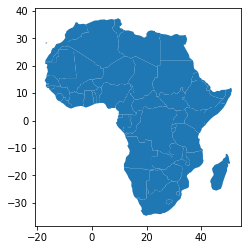

In [21]:
africa_geometry.plot()

In [22]:
africa_geo = africa_geometry.rename(columns = {'geounit': 'country'})
africa_geo.head(25)

,type,country,geometry
0,Sovereign country,Angola,"MULTIPOLYGON (((23.96790 -10.87180, 23.01183 -..."
1,Sovereign country,Burundi,"POLYGON ((30.55700 -2.40087, 29.69137 -2.81158..."
2,Sovereign country,Benin,"POLYGON ((3.59336 11.69167, 2.84401 12.39758, ..."
3,Sovereign country,Burkina Faso,"POLYGON ((0.22129 14.90036, -0.76062 15.06721,..."
4,Geo subunit,French Southern and Antarctic Lands,None
5,Sovereign country,Botswana,"POLYGON ((25.25988 -17.78973, 24.05833 -18.123..."
6,Sovereign country,Central African Republic,"POLYGON ((22.85679 10.92159, 22.45628 10.99860..."
7,Sovereign country,Ivory Coast,"POLYGON ((-5.51511 10.42103, -6.01898 10.19001..."
8,Sovereign country,Cameroon,"POLYGON ((15.49250 7.52038, 15.18243 8.48299, ..."
9,Sovereign country,Democratic Republic of the Congo,"POLYGON ((27.44332 5.06895, 26.46142 5.05611, ..."
